# Mood Pattern Analyzer – Interactive Demo
# ------------------------------------------------------------
# This Jupyter Notebook demonstrates how the Mood Pattern Analyzer
# ingests mood logs, detects patterns, and generates micro-actions.

In [1]:
import sys, os
# Add project root to Python path so 'src' is importable
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))


In [2]:
import pandas as pd
from IPython.display import display, Image, JSON
from src.data_loader import load_mood_data
from src.mood_mapper import map_mood_to_score
from src.pattern_detector import detect_temporal_patterns, cluster_note_patterns
from src.micro_action_generator import generate_micro_actions
from src.visualizer import plot_mood_trend
from src.utils import save_json

D:\zumlo_assesment\mood_analyzer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# ------------------------------------------------------------
# 1️⃣ Load Sample Data
# ------------------------------------------------------------

In [3]:
df = load_mood_data("../data/sample_mood_logs.json")
display(df)

,date,mood,notes
0,2025-10-25,anxious,"Late meeting, couldn't sleep"
1,2025-10-26,calm,Evening walk with family
2,2025-10-27,sad,"Busy Sunday, felt lonely"
3,2025-10-28,happy,Great productive day
4,2025-10-29,anxious,"Workload increased, skipped lunch"


# Map moods to numeric scores for visualization

In [4]:
df["mood_score"] = df["mood"].apply(map_mood_to_score)

# ------------------------------------------------------------
# 2️⃣ Plot Mood Trend
# ------------------------------------------------------------

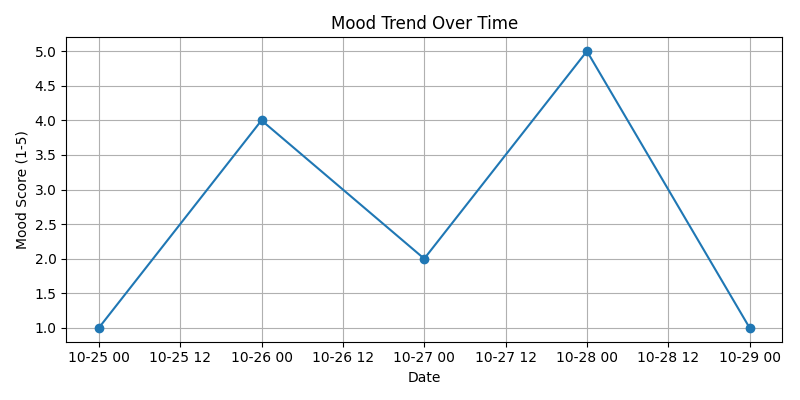

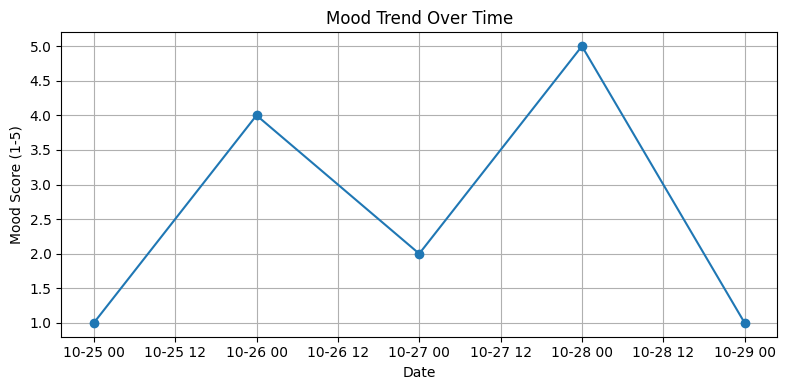

In [5]:
plot_path = plot_mood_trend(df, output_path="../outputs/mood_trend_demo.png")
display(Image(filename=plot_path))

# ------------------------------------------------------------
# 3️⃣ Temporal Pattern Detection
# ------------------------------------------------------------

In [6]:
temporal_patterns = detect_temporal_patterns(df)
print("📊 Temporal Patterns Detected:")
for p in temporal_patterns:
    print(f" - {p['description']}")

📊 Temporal Patterns Detected:
 - Mood dips on Saturdays
 - Mood peaks on Tuesdays


# ------------------------------------------------------------
# 4️⃣ Note-based Clustering (Optional)
# ------------------------------------------------------------

In [7]:
note_patterns = cluster_note_patterns(df)
print("\n🧩 Cluster Patterns Detected:")
for p in note_patterns:
    print(f" - {p['description']}")


🧩 Cluster Patterns Detected:
 - Cluster 2 shows frequent 'anxious' moods
 - Cluster 0 shows frequent 'calm' moods
 - Cluster 1 shows frequent 'happy' moods


# ------------------------------------------------------------
# 5️⃣ Generate Micro-Actions
# ------------------------------------------------------------

In [8]:
all_patterns = temporal_patterns + note_patterns
final_output = {"patterns": []}

for pattern in all_patterns:
    pattern["micro_actions"] = generate_micro_actions(pattern["description"])
    final_output["patterns"].append(pattern)

# ------------------------------------------------------------
# 6️⃣ Display JSON Result Inline
# ------------------------------------------------------------

In [9]:
save_json(final_output, "../outputs/notebook_demo_results.json")

print("\n✅ Generated Micro-Actions and Patterns:")
display(JSON(final_output))


✅ Generated Micro-Actions and Patterns:


<IPython.core.display.JSON object>

# ------------------------------------------------------------
# 7️⃣ Interactive Exploration
# ------------------------------------------------------------
# Users can adjust the JSON path below to test different datasets

In [ ]:
import ipywidgets as widgets
from IPython.display import clear_output

def analyze_file(json_path):
    clear_output()
    df = load_mood_data(json_path)
    df["mood_score"] = df["mood"].apply(map_mood_to_score)
    plot_path = plot_mood_trend(df, output_path="../outputs/mood_trend_widget.png")
    display(Image(filename=plot_path))
    print("Patterns:")
    for p in detect_temporal_patterns(df):
        print(" -", p["description"])

widgets.interact(
    analyze_file,
    json_path=widgets.Text(value="../data/sample_mood_logs.json", description="Mood JSON Path:")
);